IMDB DATASETS MOVIES REVIEWS

The purpose of this project is to classifier the IMDB Datasets Movies Reviews of 50,000 into positive or negative reviews

In [1]:
# let import some of the python liberies for this project
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import seaborn as sb
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
# let bring in the IMDB Datasets
ds = pd.read_csv('IMDB Dataset.csv')
ds.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
# let check the number of rows and columns in the datasets
ds.shape

(50000, 2)

In [4]:
# let check the type of data available
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'SENTIMENT DISTRIBUTION')

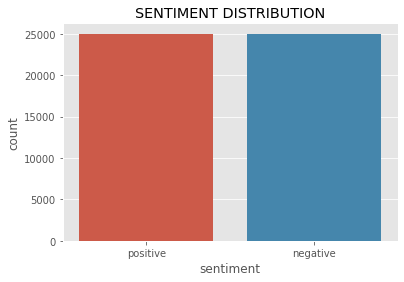

In [5]:
# let check the number of sentiment that made up of positive and negative reviews
sb.countplot(x='sentiment', data =ds)
plt.title ("SENTIMENT DISTRIBUTION")

In [6]:
# let view the first 5 rows of the Review and Sentiment in the Datasets
for i in range (5):
    print("Review: ", [i])
    print(ds['review'].iloc[i], "\n")
    print("sentiment: ", ds['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [7]:
# Let know the number of words in each review 
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

ds['word count'] = ds['review'].apply(no_of_words)

In [8]:
# Let check the IMDB Datasets
ds.head()
ds.shape

(50000, 3)

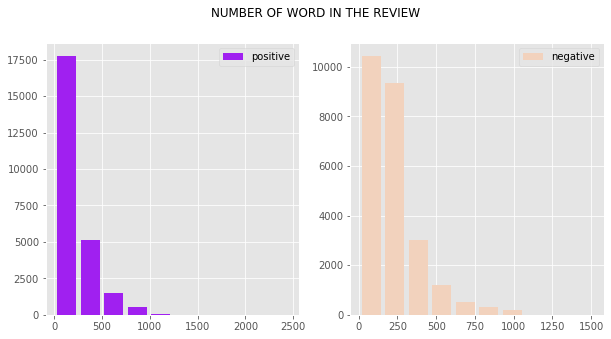

In [9]:
# Let check the number of word in the word count on chart
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(ds[ds['sentiment'] =='positive']['word count'], label='positive', color ='#A020F0', rwidth=0.8);
ax[0].legend(loc='upper right');
ax[1].hist(ds[ds['sentiment'] == 'negative']['word count'], label='negative', color ='#F2D2BD', rwidth =0.8)
ax[1].legend(loc='upper right')
fig.suptitle("NUMBER OF WORD IN THE REVIEW")
plt.show()

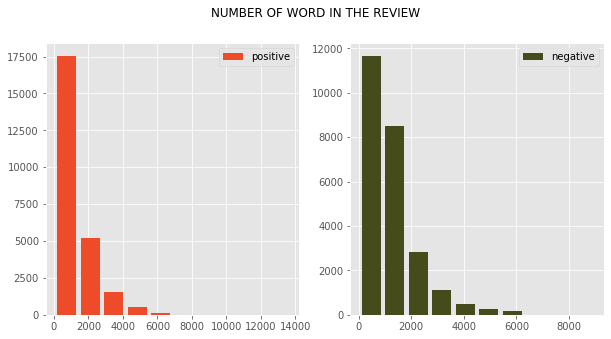

In [10]:
# let check the number of word in the review on chart
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(ds[ds['sentiment'] =='positive']['review'].str.len(), label='positive', color ='#EE4B2B', rwidth=0.8);
ax[0].legend(loc='upper right');
ax[1].hist(ds[ds['sentiment'] == 'negative']['review'].str.len(), label='negative', color ='#454B1B', rwidth =0.8)
ax[1].legend(loc='upper right')
fig.suptitle("NUMBER OF WORD IN THE REVIEW")
plt.show()

In [11]:
# let replace the sentiment column text with number
ds.sentiment.replace("positive", 1, inplace=True)
ds.sentiment.replace("negative", 2, inplace=True)
ds.head()

review  sentiment  word count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          2         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230

CLEANING OF IMDB DATASETS FOR VISUAL ANALYSIS

In [12]:
# let import nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\MERCYFULL
[nltk_data]     GOD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stop_words = set(stopwords.words('english'))

In [14]:
# let process the dataset for cleaning
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [15]:
ds.review = ds['review'].apply(data_processing)

In [16]:
duplicated_count = ds.duplicated().sum()
print("Number of  Duplicate entries: ", duplicated_count)

Number of  Duplicate entries:  421


In [17]:
ds = ds.drop_duplicates('review')

In [18]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [19]:
ds.review = ds['review'].apply(lambda x: stemming(x))

In [20]:
ds['word count'] = ds['review'].apply(no_of_words)

In [21]:
ds.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
3  basically theres family little boy jake thinks...          2          67
4  petter matteis love time money visually stunni...          1         125

VISUALIZE THE POSITIVE REVIEWS ON THE DATASETS

In [22]:
pos_reviews = ds [ds.sentiment == 1]

In [23]:
pos_reviews.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
4  petter matteis love time money visually stunni...          1         125
5  probably alltime favorite movie story selfless...          1          58

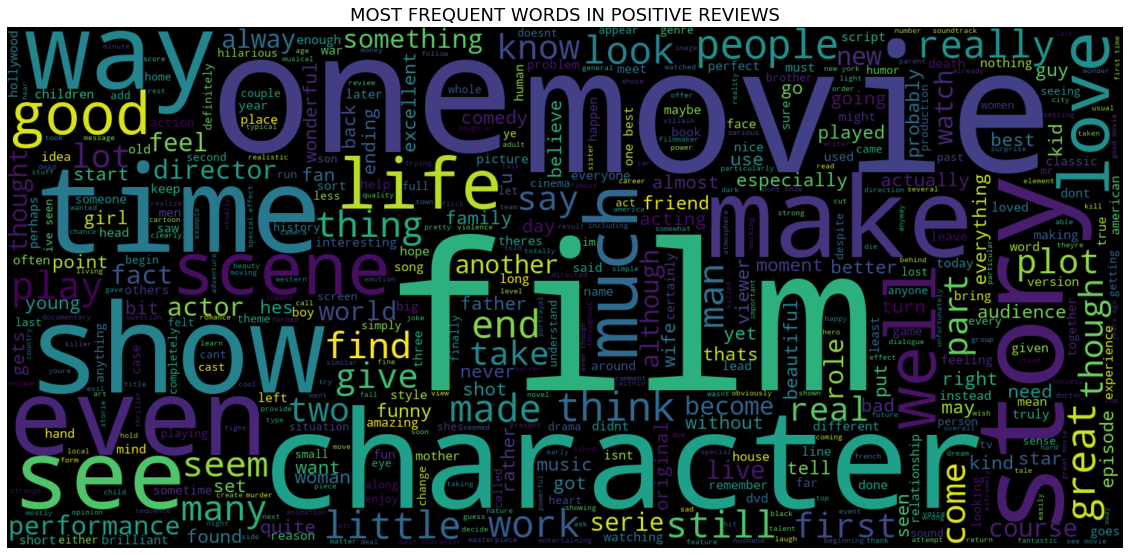

In [24]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1500, height=700).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('MOST FREQUENT WORDS IN POSITIVE REVIEWS', fontsize=18)
plt.show()

In [25]:
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [26]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0   film  39285
1  movie  35830
2    one  25621
3   like  16998
4   good  14281

In [27]:
# let create bar chart from the common word in positive reviews
px.bar(pos_words, x='count', y='word', title='THE COMMON WORD IN POSITIVE REVIEWS', color='word')

VISUALIZE THE NEGATIVE REVIEWS ON THE DATASETS

In [28]:
neg_reviews = ds [ds.sentiment == 2]
neg_reviews.head()

review  sentiment  word count
3   basically theres family little boy jake thinks...          2          67
7   show amazing fresh innovative idea 70s first a...          2          83
8   encouraged positive comments film looking forw...          2          64
10  phil alien one quirky films humour based aroun...          2          51
11  saw movie 12 came recall scariest scene big bi...          2          84

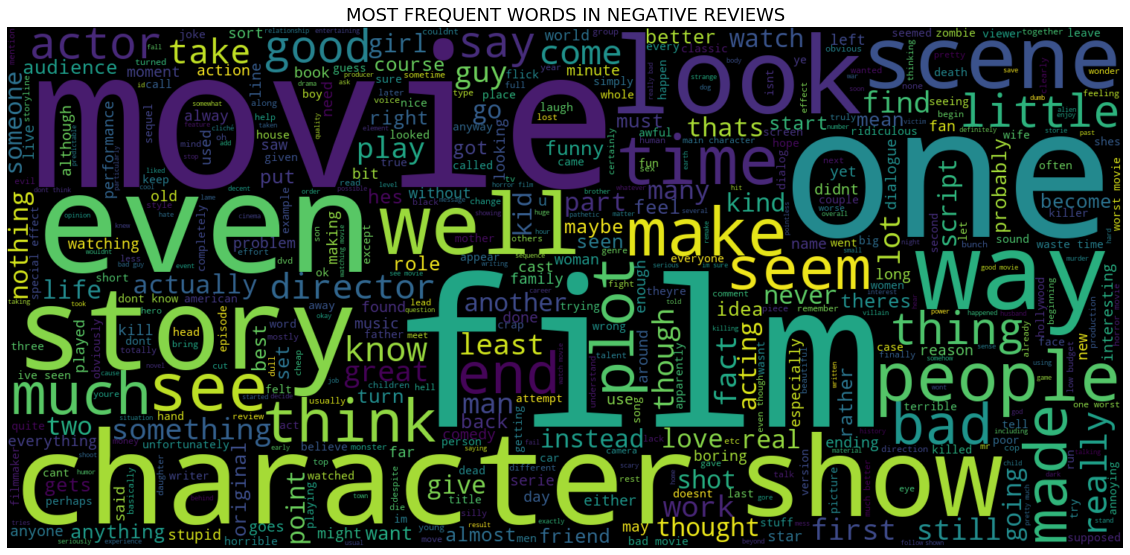

In [29]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1500, height=700).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('MOST FREQUENT WORDS IN NEGATIVE REVIEWS', fontsize=18)
plt.show()

In [30]:
# let count the most common word in negative reviews in descending order
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [31]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

word  count
0  movie  47001
1   film  34651
2    one  24361
3   like  21508
4   even  14759

In [32]:
# let create bar chart from the common word in negative reviews
px.bar(neg_words, x='count', y='word', title='THE COMMON WORD IN NEGATIVE REVIEWS', color='word')

In [33]:
# Let split the dataset in X and Y
X = ds['review']
Y = ds['sentiment']

In [34]:
tiv = TfidfVectorizer()
X = tiv.fit_transform(ds['review'])

In [35]:
# Let split the datasets in to train and test datasets for modelling
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [36]:
print("Size of x_train:", (x_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_train:", (y_train.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (34704, 221707)
Size of x_test: (14874, 221707)
Size of y_train: (34704,)
Size of y_test: (14874,)


BUILDING OF MODELS WITH THE IMBD DATASETS

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

In [38]:
logr = LogisticRegression()
logr.fit(x_train, y_train)
logr_pred = logr.predict(x_test)
logr_acc = accuracy_score(logr_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logr_acc*100))

Test Accuracy: 89.00%


In [39]:
print(confusion_matrix(logr_pred,y_test))
print(classification_report(logr_pred, y_test))

[[6785  908]
 [ 728 6453]]
              precision    recall  f1-score   support

           1       0.90      0.88      0.89      7693
           2       0.88      0.90      0.89      7181

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [40]:
detr = DecisionTreeClassifier()
detr.fit(x_train, y_train)
detr_pred = detr.predict(x_test)
detr_acc = accuracy_score(detr_pred, y_test)
print("Test Accuracy: {:.2f}%".format(detr_acc*100))

Test Accuracy: 70.82%


In [41]:
print(confusion_matrix(detr_pred,y_test))
print(classification_report(detr_pred, y_test))

[[5316 2143]
 [2197 5218]]
              precision    recall  f1-score   support

           1       0.71      0.71      0.71      7459
           2       0.71      0.70      0.71      7415

    accuracy                           0.71     14874
   macro avg       0.71      0.71      0.71     14874
weighted avg       0.71      0.71      0.71     14874



In [45]:
kngr = KNeighborsClassifier()
kngr.fit(x_train, y_train)
kngr_pred = kngr.predict(x_test)
kngr_acc = accuracy_score(kngr_pred, y_test)
print("Test Accuracy: {:.2f}%".format(kngr_acc*100))

Test Accuracy: 77.24%


In [46]:
print(confusion_matrix(kngr_pred,y_test))
print(classification_report(kngr_pred, y_test))

[[6311 2183]
 [1202 5178]]
              precision    recall  f1-score   support

           1       0.84      0.74      0.79      8494
           2       0.70      0.81      0.75      6380

    accuracy                           0.77     14874
   macro avg       0.77      0.78      0.77     14874
weighted avg       0.78      0.77      0.77     14874



In [44]:
lis = LinearSVC()
lis.fit(x_train, y_train)
lis_pred = lis.predict(x_test)
lis_acc = accuracy_score(lis_pred, y_test)
print("Test Accuracy: {:.2f}%".format(lis_acc*100))

Test Accuracy: 89.22%


In [45]:
print(confusion_matrix(lis_pred,y_test))
print(classification_report(lis_pred, y_test))

[[6766  857]
 [ 747 6504]]
              precision    recall  f1-score   support

           1       0.90      0.89      0.89      7623
           2       0.88      0.90      0.89      7251

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [46]:
rafc = RandomForestClassifier()
rafc.fit(x_train, y_train)
rafc_pred = rafc.predict(x_test)
rafc_acc = accuracy_score(rafc_pred, y_test)
print("Test Accuracy: {:.2f}%".format(rafc_acc*100))

Test Accuracy: 85.04%


In [47]:
print(confusion_matrix(rafc_pred,y_test))
print(classification_report(rafc_pred, y_test))

[[6512 1224]
 [1001 6137]]
              precision    recall  f1-score   support

           1       0.87      0.84      0.85      7736
           2       0.83      0.86      0.85      7138

    accuracy                           0.85     14874
   macro avg       0.85      0.85      0.85     14874
weighted avg       0.85      0.85      0.85     14874



From the model results above, I found out that the best model for IMDB Datasets Movies Reviews is LinearSVC Model with 89.22%
compared to other models.Let see if the best model is hyper tunned will increase the score.

HYPERPARAMETER TUNING OF THE BEST MODEL

In [50]:
# let hyperparameter tunning of the best model
para_grid = {'C':[0.1,1,10,100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(lis, para_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)
print("Best Grid Validation Score:{:0.2f}".format(grid.best_score_))
print("Best Parameters: ", grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=0.1, loss=hinge ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=0.1, loss=hinge, score=0.872, total=   0.5s
[CV] C=0.1, loss=hinge ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ................... C=0.1, loss=hinge, score=0.875, total=   0.5s
[CV] C=0.1, loss=hinge ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] ................... C=0.1, loss=hinge, score=0.871, total=   0.5s
[CV] C=0.1, loss=hinge ...............................................
[CV] ................... C=0.1, loss=hinge, score=0.878, total=   0.5s
[CV] C=0.1, loss=hinge ...............................................
[CV] ................... C=0.1, loss=hinge, score=0.874, total=   0.5s
[CV] C=0.1, loss=squared_hinge .......................................
[CV] ........... C=0.1, loss=squared_hinge, score=0.892, total=   0.9s
[CV] C=0.1, loss=squared_hinge .......................................
[CV] ........... C=0.1, loss=squared_hinge, score=0.895, total=   0.9s
[CV] C=0.1, loss=squared_hinge .......................................
[CV] ........... C=0.1, loss=squared_hinge, score=0.888, total=   0.7s
[CV] C=0.1, loss=squared_hinge .......................................
[CV] ........... C=0.1, loss=squared_hinge, score=0.894, total=   0.7s
[CV] C=0.1, loss=squared_hinge .......................................
[CV] .

C:\Users\MERCYFULL GOD\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] ................... C=100, loss=hinge, score=0.874, total=  22.9s
[CV] C=100, loss=hinge ...............................................
[CV] ................... C=100, loss=hinge, score=0.880, total=   9.0s
[CV] C=100, loss=hinge ...............................................
[CV] ................... C=100, loss=hinge, score=0.878, total=  22.1s
[CV] C=100, loss=squared_hinge .......................................
[CV] ........... C=100, loss=squared_hinge, score=0.877, total=   5.4s
[CV] C=100, loss=squared_hinge .......................................
[CV] ........... C=100, loss=squared_hinge, score=0.882, total=  12.2s
[CV] C=100, loss=squared_hinge .......................................
[CV] ........... C=100, loss=squared_hinge, score=0.875, total=  17.4s
[CV] C=100, loss=squared_hinge .......................................
[CV] ........... C=100, loss=squared_hinge, score=0.881, total=  15.6s
[CV] C=100, loss=squared_hinge .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.3min finished


Best Grid Validation Score:0.89
Best Parameters:  {'C': 1, 'loss': 'hinge'}


In [51]:
lis = LinearSVC(C=1, loss='hinge')
lis.fit(x_train, y_train)
lis_pred = lis.predict(x_test)
lis_acc = accuracy_score(lis_pred, y_test)
print("Test Accuracy: {:.2f}%".format(lis_acc*100))

Test Accuracy: 89.41%


In [52]:
print(confusion_matrix(lis_pred,y_test))
print(classification_report(lis_pred, y_test))

[[6788  850]
 [ 725 6511]]
              precision    recall  f1-score   support

           1       0.90      0.89      0.90      7638
           2       0.88      0.90      0.89      7236

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



The result from the hyperparameter tunning of LinearSVC shown that there was an increase in the best model accuracy score from 89.22% to 89.41%